In [5]:
import daft
import numpy as np
import pymc3 as pm
import pandas as pd


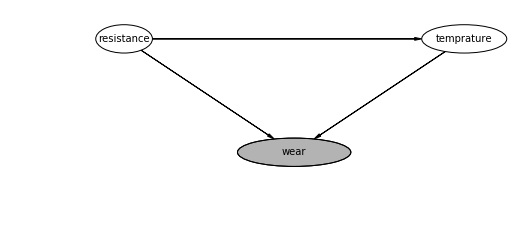

In [13]:
pgm = daft.PGM([9,4], origin=[1,0.5])
pgm.add_node(daft.Node('r', 'resistance',3,4, aspect=2))
pgm.add_node(daft.Node('t','temprature',9,4, aspect=3))
pgm.add_node(daft.Node('w','wear', 6,2, aspect=4, observed=4))
pgm.add_edge('r', 't')
pgm.add_edge('r','w')
pgm.add_edge('t','w')
pgm.render()


In [20]:
model = pm.Model()
with model:
    resistance = pm.Bernoulli('resistance',0.2)
    temprature_prop = pm.Deterministic('temprature_prop',pm.math.switch(resistance,0.01,0.4))
    temprature = pm.Bernoulli('temprature',temprature_prop)
    wear_prop = pm.Deterministic('wear_prop',pm.math.switch(resistance,pm.math.switch(temprature,0.99,0.80),pm.math.switch(temprature,0.9,0.01)))
    wear = pm.Bernoulli('wear',wear_prop)
    step= pm.Metropolis()
    trace =pm.sample(100000,step=step,tune=5000,random_seed=123, progressbar = True)

100%|████████████████████████████████| 105000/105000 [00:49<00:00, 2126.03it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001021EAC8>,
      dtype=object)

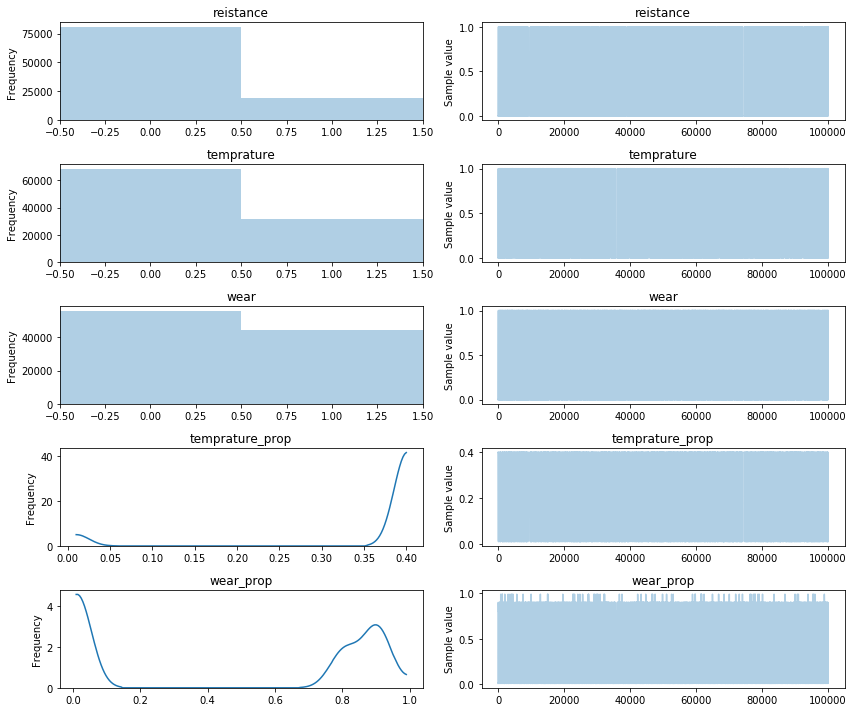

In [17]:
pm.traceplot(trace)

In [21]:

dictionary = { 'resistance' :[ii for ii in trace['resistance'].tolist()],
               'temprature' :[ii for ii in trace['temprature'].tolist()],
               'wear'     :[ii for ii in trace['wear'].tolist()],
               'wear_prop'     :[ii for ii in trace['wear_prop'].tolist()],   
              }